# How Image Rotated?

Here we talk about rotate an image using SO(2).

rotate by its coordinate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import itertools

image come from [https://www.pexels.com/photo/animal-biology-bloom-blossom-460067/]{https://www.pexels.com/photo/animal-biology-bloom-blossom-460067/}

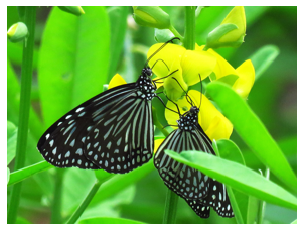

In [2]:
Img = PIL.Image.open("./animal-biology-bloom-blossom-460067.jpg")

Img = Img.resize((Img.size[0] // 16, Img.size[1] // 16))

Img = np.asarray(Img)
plt.imshow(Img)
plt.axis('off')
plt.show()

$$
SO(2) = \begin{bmatrix}
    cos(x) & -sin(x)\\
    sin(x) &  cos(x)
\end{bmatrix}
$$

In [3]:
def SO2(angle):
    cox = np.cos(angle)
    six = np.sin(angle)
    return np.asarray([[cox, -six], [six, cox]])

Rotate the image at its center.

In [4]:
Img.shape

(216, 288, 3)

In [5]:
midW, midH, _ = np.asarray(Img.shape) // 2

In [6]:
outCorner = np.asarray([
    [-midW,  midH],
    [ midW,  midH],
    [ midW, -midH],
    [-midW, -midH]
]) @ SO2(np.pi/3)

print(outCorner)

outW, outH = np.ceil(outCorner.max(0) - outCorner.min(0)).astype(np.int32)
print(outW, outH)

[[  70.70765814  165.53074361]
 [ 178.70765814  -21.53074361]
 [ -70.70765814 -165.53074361]
 [-178.70765814   21.53074361]]
358 332


In [7]:
outImg = np.zeros((outW, outH, 3), dtype=Img.dtype)
print(outImg.shape)

(358, 332, 3)


In [8]:
midOutW, midOutH = outW//2, outH//2

inverse of SO(2) is its transpose

In [9]:
rot = SO2(np.pi/3).T
print(rot)

[[ 0.5        0.8660254]
 [-0.8660254  0.5      ]]


In [10]:
midWH = np.array([midW, midH])
for i,j in itertools.product(range(-midOutW, midOutW), range(-midOutH, midOutH)):
    w,h = np.dot([i,j], rot) + midWH
    w,h = np.floor([w,h]).astype(np.int32)
    if w < 0 or h < 0 or w >= Img.shape[0] or h >= Img.shape[1]:
        # out of bound
        continue
    outImg[i+midOutW,j+midOutH] = Img[w,h]

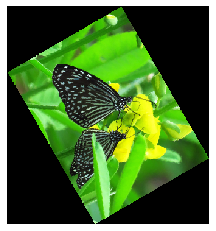

In [11]:
plt.imshow(outImg)
plt.axis('off')
plt.show()